# Image Segmentation using Convolutional Neural Networks with Keras and Tensor Flow 

## Import Necesary stuff
### What we need here:
* tensorflow
* keras
* matplotlib

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Load data

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## Normalize pixel values on data so we have [0, 255] values

In [6]:
train_images, test_images = train_images / 255.0, test_images / 255.0

## Prepare known classes 

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Initial plot, examples of classes

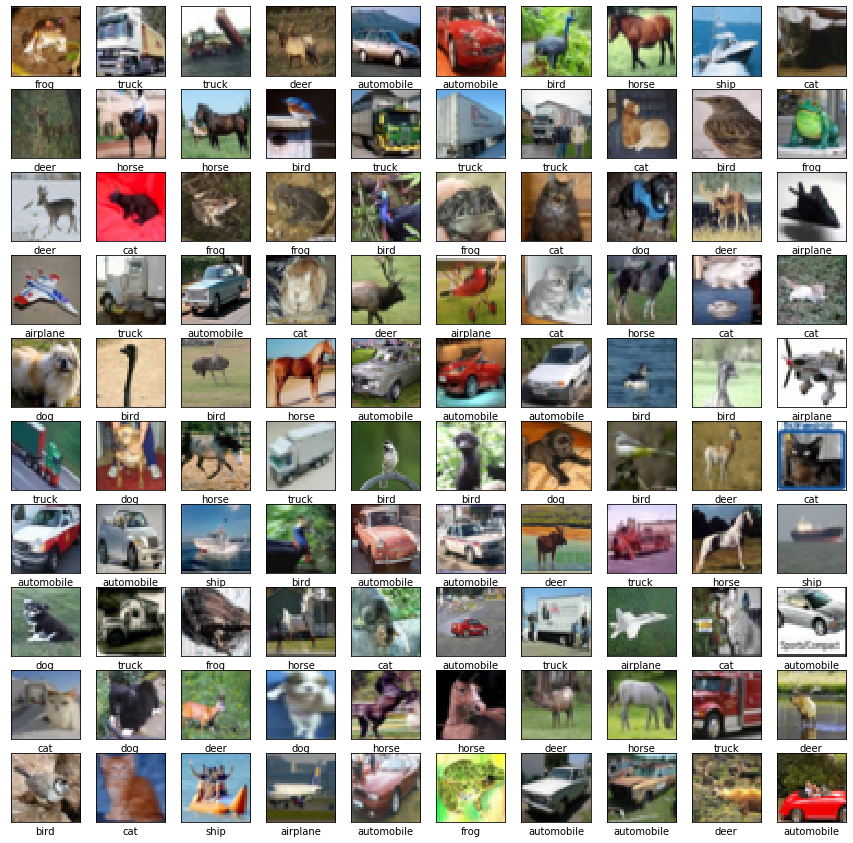

In [8]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Build model

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=test_images.shape[1:]))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 64)       

## Train model

In [17]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 207s 4ms/sample - loss: 1.8467 - accuracy: 0.2852 - val_loss: 1.5123 - val_accuracy: 0.4155
Epoch 2/5
50000/50000 [==============================] - 208s 4ms/sample - loss: 1.3927 - accuracy: 0.4890 - val_loss: 1.2776 - val_accuracy: 0.5376
Epoch 3/5
50000/50000 [==============================] - 205s 4ms/sample - loss: 1.2045 - accuracy: 0.5678 - val_loss: 1.0898 - val_accuracy: 0.6087
Epoch 4/5
50000/50000 [==============================] - 205s 4ms/sample - loss: 1.0917 - accuracy: 0.6144 - val_loss: 0.9921 - val_accuracy: 0.6482
Epoch 5/5
50000/50000 [==============================] - 205s 4ms/sample - loss: 1.0254 - accuracy: 0.6394 - val_loss: 0.9663 - val_accuracy: 0.6651


## Plot train results

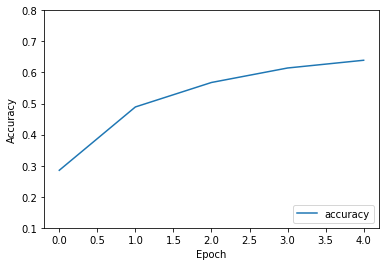

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 0.8])
plt.legend(loc='lower right')

## Analyze test images

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

10000/1 - 6s - loss: 0.8912 - accuracy: 0.6651
0.6651


In [21]:
predicted = model.predict_classes(test_images)
print(predicted)

[3 8 8 ... 5 1 7]


## Print Confusion Matrix
First import confusion_matrix from sklearn.metrics

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, predicted))
#print (test_labels)

[[641  25 140  19   8   4  17   5 116  25]
 [  8 859   2   9   0   0  25   2  46  49]
 [ 56   4 500 102 103  67 138   7  20   3]
 [  8   6  83 519  41 147 150   9  27  10]
 [ 13   6 115  66 569  37 141  42   9   2]
 [  4   3  65 295  44 499  56  23   9   2]
 [  2   2  31  60  16   4 868   1  15   1]
 [ 10   1  42  85 107 107  19 613   2  14]
 [ 53  28  24  22   2   2   9   3 852   5]
 [ 39 106   7  42   4   2  25   7  37 731]]
